# **RNN Introduction**


## Importing required libraries


In [61]:
!pip install mplfinance
!pip install opendatasets

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [62]:
# Basic libraries
import numpy as np
import pandas as pd
import warnings


# For processing
import math
import random
import datetime as dt
import matplotlib.dates as mdates

# For visualization
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc

# Libraries for model training
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import mean_squared_error

## Loading and preprocessing the data
### Dataset 4-Deep learning/5-Time Series Forecasting (RNN)/LAB/ٌDatasets/traffic.csv

In [63]:
df = pd.read_csv("traffic (1).csv",parse_dates=['DateTime']).iloc[::-1]
df.head()

,DateTime,Junction,Vehicles,ID
48119,2017-06-30 23:00:00,4,12,20170630234
48118,2017-06-30 22:00:00,4,22,20170630224
48117,2017-06-30 21:00:00,4,16,20170630214
48116,2017-06-30 20:00:00,4,30,20170630204
48115,2017-06-30 19:00:00,4,11,20170630194


In [64]:
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%m/%d/%Y %H:%M:%S')
df = pd.DataFrame(df)
df['Hour'] = df['DateTime'].dt.hour
df['month'] = df['DateTime'].dt.month

df.head()

,DateTime,Junction,Vehicles,ID,Hour,month
48119,2017-06-30 23:00:00,4,12,20170630234,23,6
48118,2017-06-30 22:00:00,4,22,20170630224,22,6
48117,2017-06-30 21:00:00,4,16,20170630214,21,6
48116,2017-06-30 20:00:00,4,30,20170630204,20,6
48115,2017-06-30 19:00:00,4,11,20170630194,19,6


In [65]:
df.drop("ID",axis=1)

,DateTime,Junction,Vehicles,Hour,month
48119,2017-06-30 23:00:00,4,12,23,6
48118,2017-06-30 22:00:00,4,22,22,6
48117,2017-06-30 21:00:00,4,16,21,6
48116,2017-06-30 20:00:00,4,30,20,6
48115,2017-06-30 19:00:00,4,11,19,6
...,...,...,...,...,...
4,2015-11-01 04:00:00,1,9,4,11
3,2015-11-01 03:00:00,1,7,3,11
2,2015-11-01 02:00:00,1,10,2,11
1,2015-11-01 01:00:00,1,13,1,11


## Visualization

## Split the data into train and test

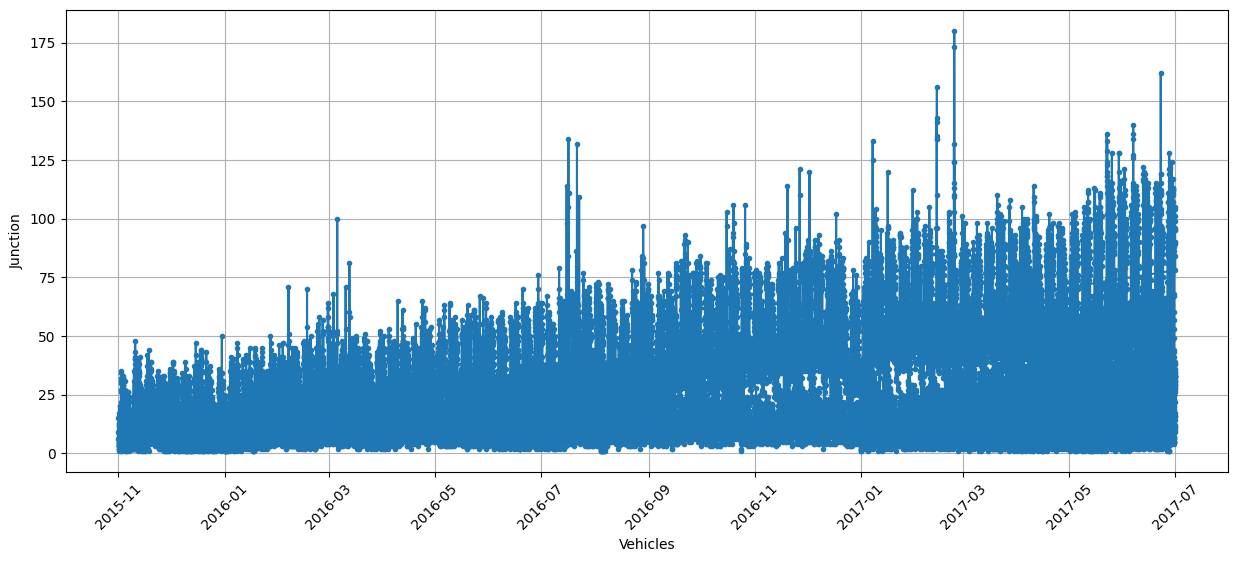

In [68]:
plt.figure(figsize=(15, 6))
plt.plot(df['DateTime'], df['Vehicles'], marker='.')
plt.xlabel('Vehicles')
plt.ylabel('Junction')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Modeling


## Visualization of results
